In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats

In [2]:
df = pd.read_csv('./AutomobileDS2.csv')
df.sample(10)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
82,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989
41,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
130,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040
182,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495
163,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449
156,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
65,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
104,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900


* Symboling - Insurance Risk Factor, 3 - most risky auto, -3 - least likely to be risky
* Normalized_losses - Average loss payment per insured vehicle
    * Symboling and Normalized_losses correlated?
* make - MAker
* Fuel_type - fuel consumed by vehicle
* aspiration - turbo or standard
* number of doors
* body_style - convertible, hatchback, sedan, hard top etc.
* drive wheels - Forward, rear wheel drive, others.
* Engine_loaction - front, rear.
* Wheel_base - length of distance
    * High Performace vehicles have longer wheel base - Related with Horsepower?
    * Shorter wheel base = less aerodynamic. Can aerodynamicity be related with a size factor = height * width, higher the factor lesser the        aerodynamicity. As drag is directly proportional to area of cross-section
* Curb_weight - weight of the vehicle with all standard equipements but without any passenger.

In [3]:
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

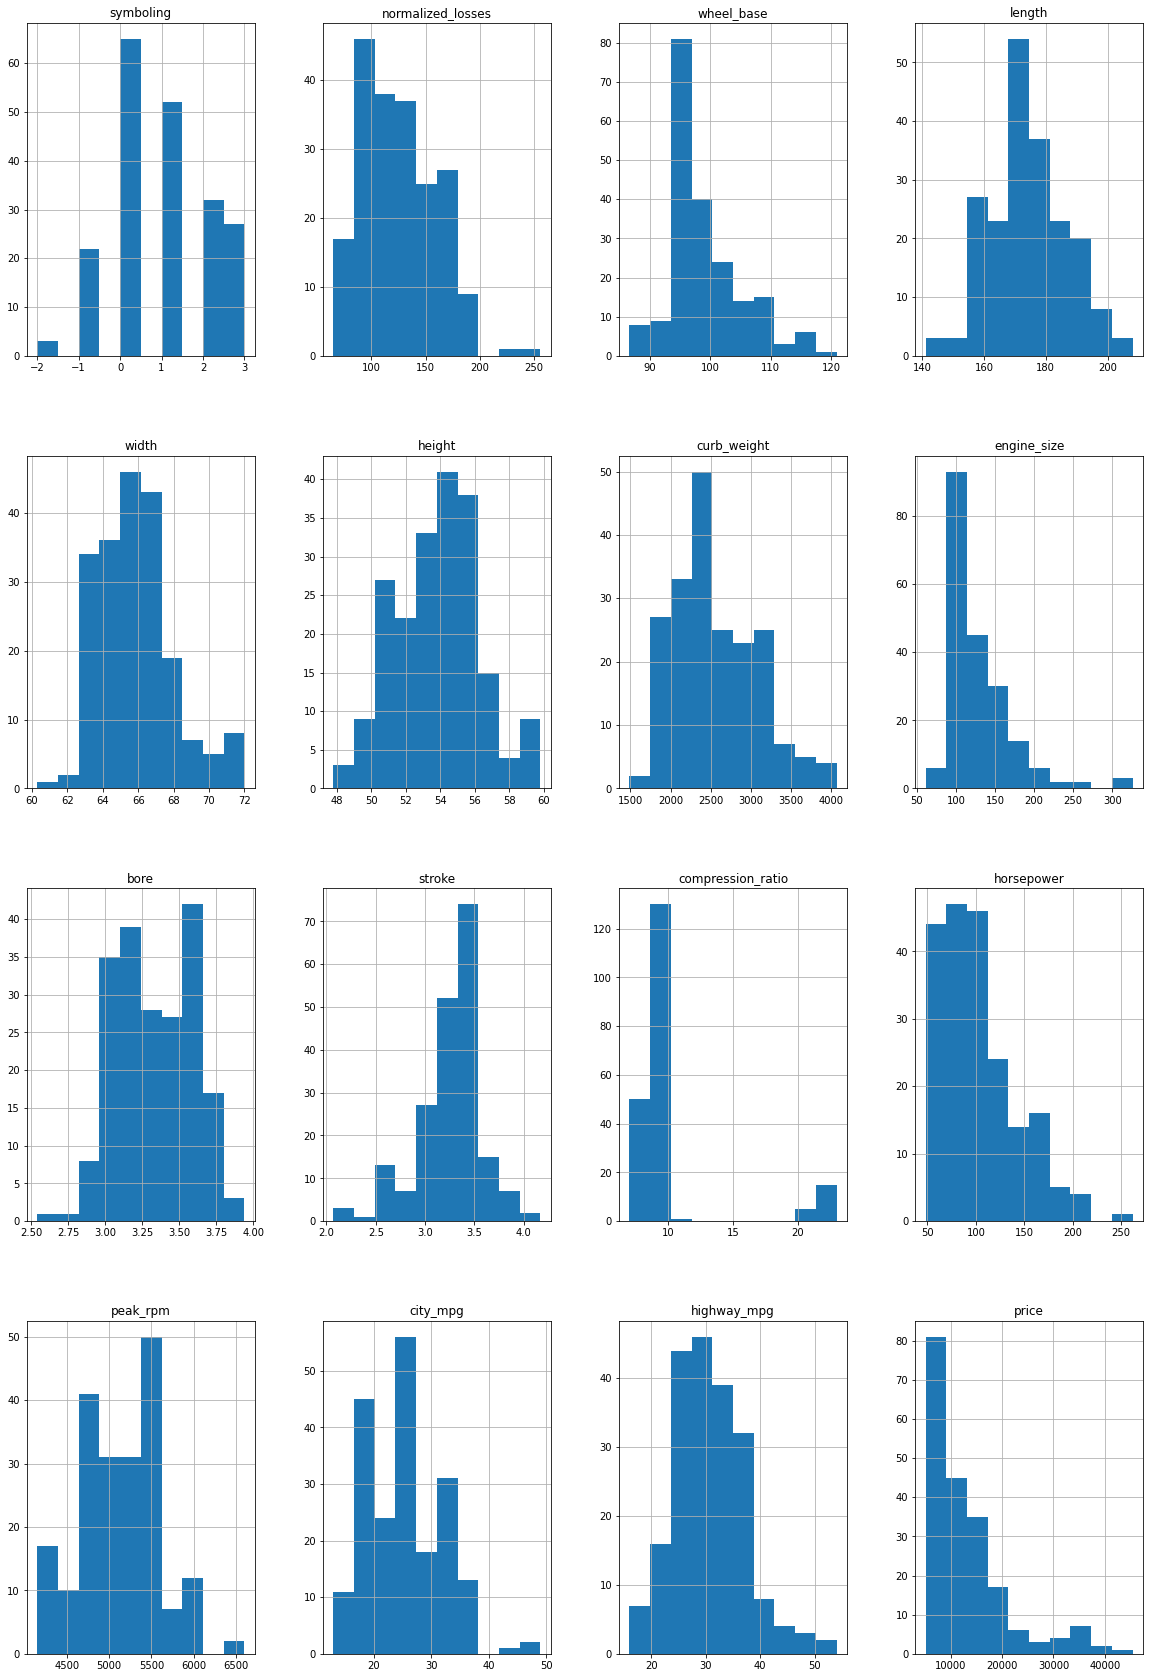

In [4]:
df.hist(figsize= (20,30));

In [5]:
df['A_factor'] = df.height * df.width
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,A_factor
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,3128.08
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,3128.08
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,3432.20
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,3594.66
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,3605.52


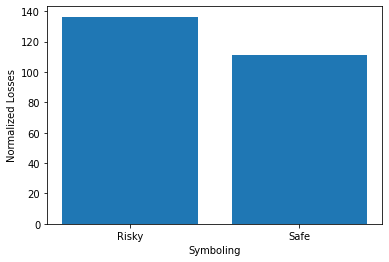

In [6]:
# Analysis on the basis of symboling and normalized_losses
# Are normalized_losses and symboling positively correlated?
# 0 is the neutral symbol rating.
dfrisky = df[df.symboling > 0]
dfsafe = df[df.symboling <= 0]
meanrisky = np.mean(dfrisky.normalized_losses)
meansafe = np.mean(dfsafe.normalized_losses)
plt.bar(['Risky', 'Safe'], [meanrisky, meansafe])
plt.xlabel('Symboling')
plt.ylabel('Normalized Losses')
plt.show()

### Therefore the hypothesis that Risky vehicles will have a greater value for nomalized losses is true, now let's verify this hypothesis with correlation.
### Symboling and normalized losses should be positively correlated.

In [7]:
df[['symboling', 'normalized_losses']].corr()

,symboling,normalized_losses
symboling,1.000000,0.474993
normalized_losses,0.474993,1.000000


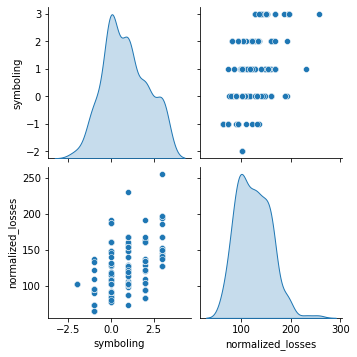

In [8]:
pp = sb.pairplot(df[['symboling', 'normalized_losses']], diag_kind= 'kde', );

# Analysis on the basis of Symboling and Fuel Type

In [9]:
# Is a particular fuel_type more risky than other?
df.fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

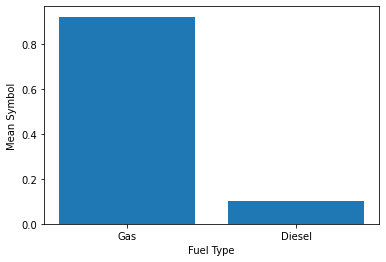

In [10]:
dfgas = df[df.fuel_type == 'gas']
dfdiesel = df[df.fuel_type == 'diesel']
meansymbolgas = stats.mean(dfgas.symboling)
meansymboldiesel = stats.mean(dfdiesel.symboling)
plt.bar(['Gas', 'Diesel'], [meansymbolgas, meansymboldiesel])
plt.xlabel('Fuel Type')
plt.ylabel('Mean Symbol')
plt.show()

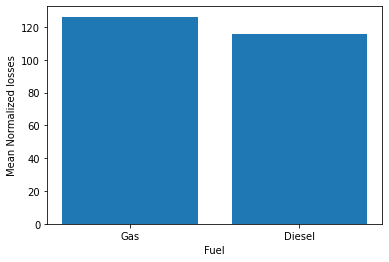

In [11]:
# verification through normalized losses
meanNLg = np.mean(dfgas.normalized_losses)
meanNLd = np.mean(dfdiesel.normalized_losses)
plt.bar(['Gas', 'Diesel'], [meanNLg, meanNLd])
plt.xlabel('Fuel')
plt.ylabel('Mean Normalized losses')
plt.show()

### Therefor gas is riskier fuel than diesel

# Analysis of symboling with price

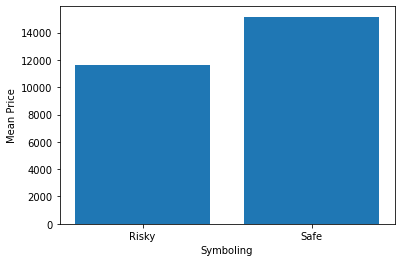

In [15]:
# are riskier vehicles more expensive or cheaper than safer vehicles.
meanpr = np.mean(dfrisky.price)
meanps = np.mean(dfsafe.price)
plt.bar(['Risky', 'Safe'], [meanpr, meanps])
plt.xlabel('Symboling')
plt.ylabel('Mean Price')
plt.show()

In [16]:
# There should be a negative correlation of symboling with price
df[['symboling', 'price']].corr()

,symboling,price
symboling,1.000000,-0.082391
price,-0.082391,1.000000


### Therefore the symboling and pricing are negatively correlated

# Analysis on the basis of Wheel Base

In [12]:
# Hypothesis - A_factor should be higher for vehicles with longer wheel base, as longer wheel base = higher aerodynamicity
maxwb = np.max(df.wheel_base)
minwb = np.min(df.wheel_base)
print(maxwb, minwb)
df.describe(include= 'all')

120.9 86.6


,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,A_factor
count,201.000000,201.000000,201,201,201,201,201,201,201,201.000000,...,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,114,94,118,198,NaN,...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,125.189055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,NaN,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353,3544.201095
std,1.254802,33.572966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,NaN,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342,224.872037
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,3128.080000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,3374.630000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,3488.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,3690.750000


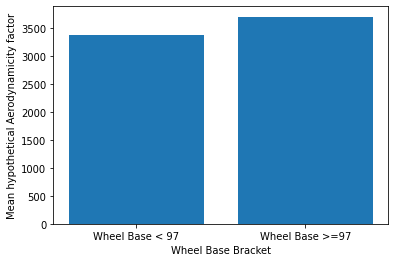

In [13]:
# as median of wheel_base = 97, we consider a wheel_base > 97 to be high
dflwb = df[df.wheel_base>=97]
dfswb = df[df.wheel_base<97]
meanlwb = np.mean(dflwb.A_factor)
meanswb = np.mean(dfswb.A_factor)
plt.bar(['Wheel Base < 97', 'Wheel Base >=97'], [meanswb, meanlwb])
plt.xlabel('Wheel Base Bracket')
plt.ylabel('Mean hypothetical Aerodynamicity factor')
plt.show()

In [14]:
df[['wheel_base', 'A_factor']].corr()
# Should be a negative correlation for a longer wheel base vehicle to be more aerodynamic

,wheel_base,A_factor
wheel_base,1.000000,0.841971
A_factor,0.841971,1.000000


### Therefore the hypothesis is discredited